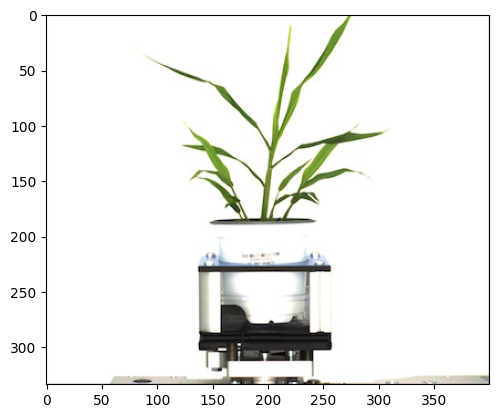

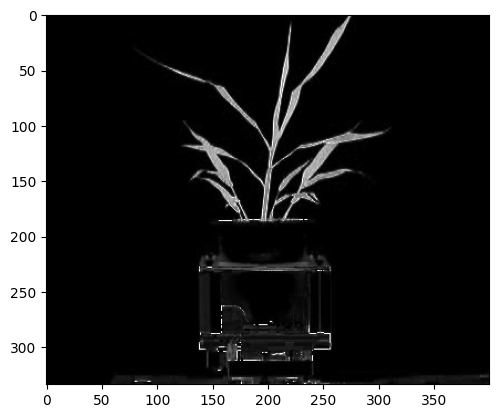

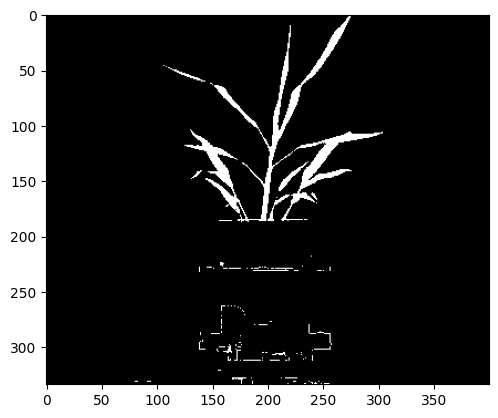

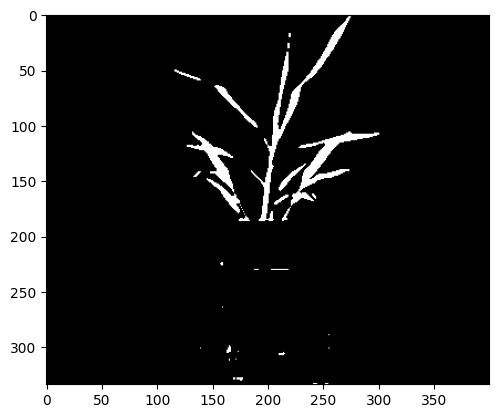

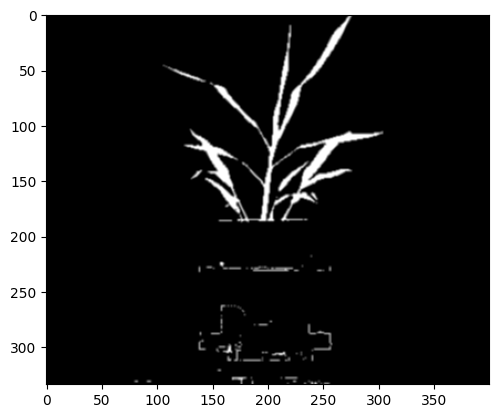

In [7]:
# pip install plantcv
# pip install plantcv jupyterlab ipympl


# Import libraries
import os
import numpy as np
import cv2
from plantcv import plantcv as pcv

pcv.params.debug = "plot"  # set debug mode to plot


# load image
img, path, filename = pcv.readimage(filename="img/original_image.jpg")

s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, object_type='light')

s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=3)
gaussian_img = pcv.gaussian_blur(img=s_thresh,ksize=(3, 3), sigma_x=0, sigma_y=None)

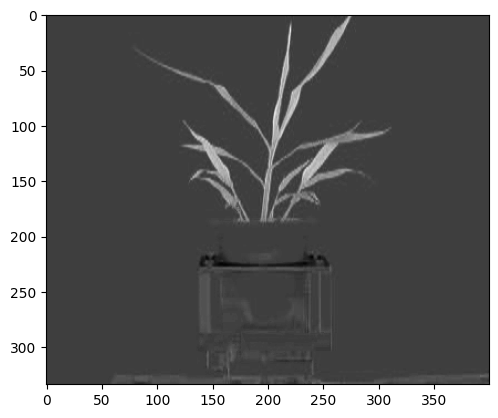

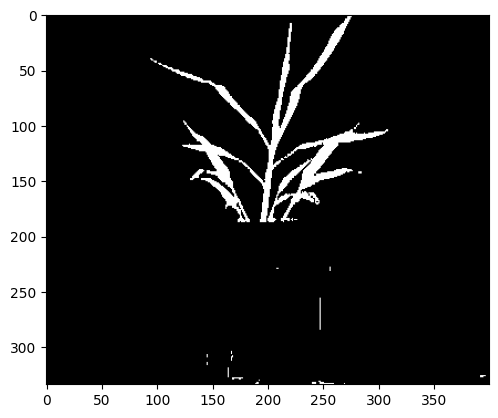

In [8]:
# Convert RGB to LAB
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')
b_thresh = pcv.threshold.binary(gray_img=b, threshold=140, object_type='light')

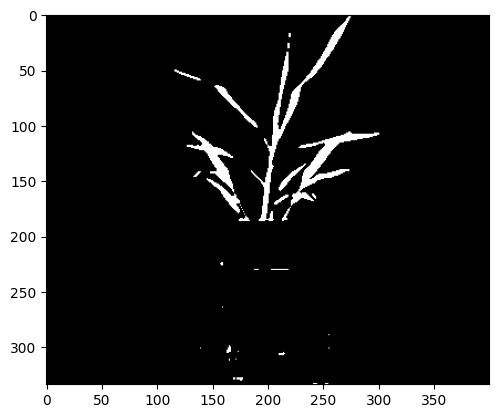

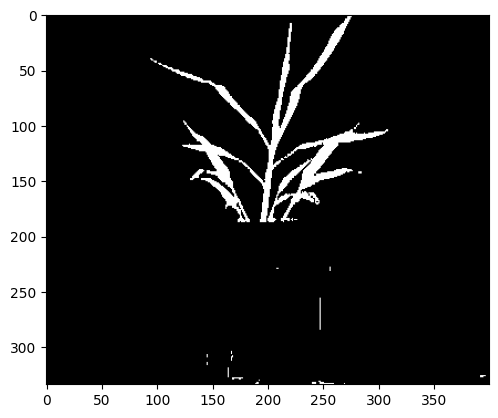

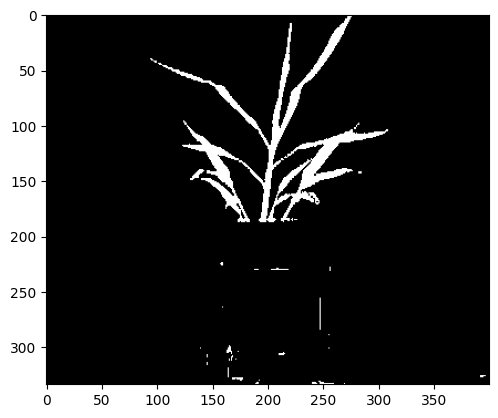

In [9]:
# gaussian blur와 b_thresh를 or 연산
pcv.plot_image(s_mblur)
pcv.plot_image(b_thresh)
bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_thresh)

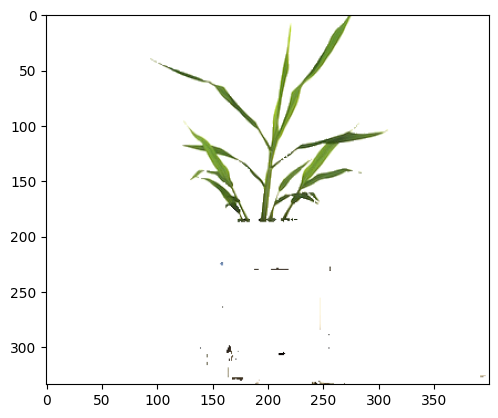

In [10]:
# masked image 생성
masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')

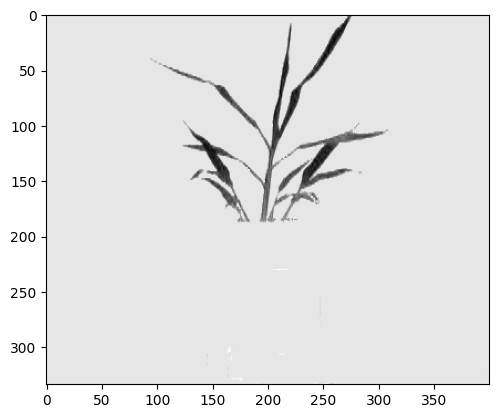

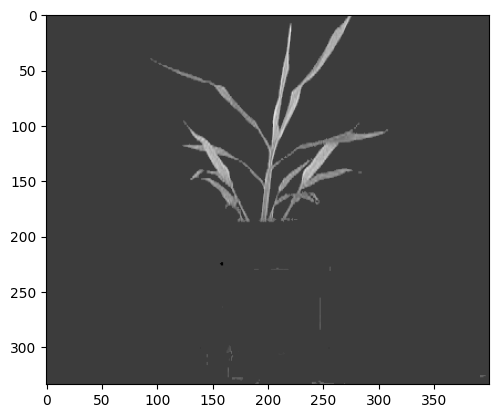

In [11]:
# Convert RGB to LAB
masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

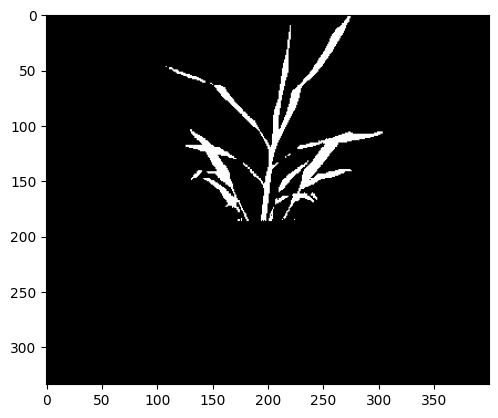

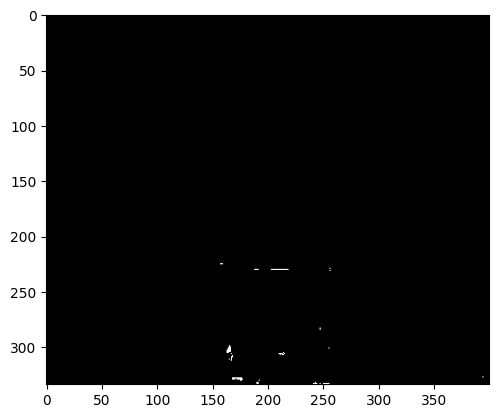

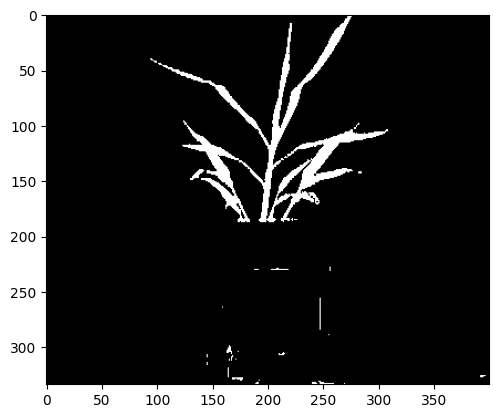

In [38]:
# Threshold the green-magenta and blue images

maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, object_type='dark')
maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=128, object_type='light')
maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, object_type='light')

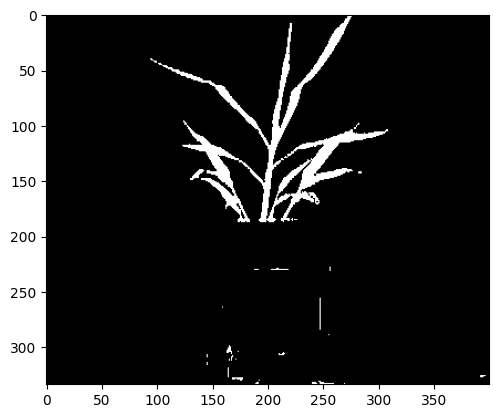

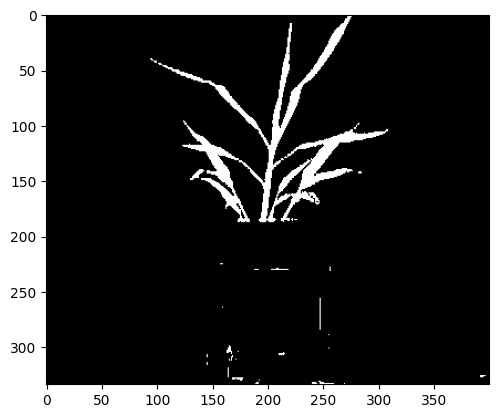

In [39]:
# a thresold와 b threshold를 or 연산
ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)

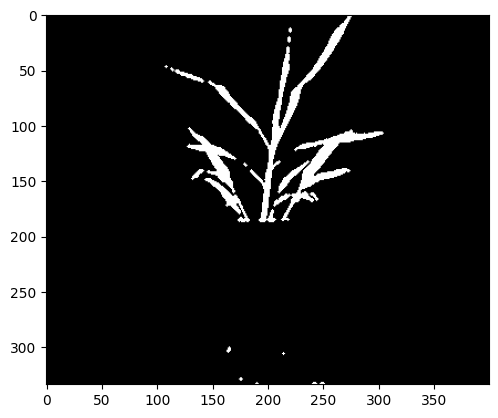

In [40]:
# openning을 사용, 침식 => 팽창으로 노이즈 제거
opened_ab = pcv.opening(gray_img=ab)

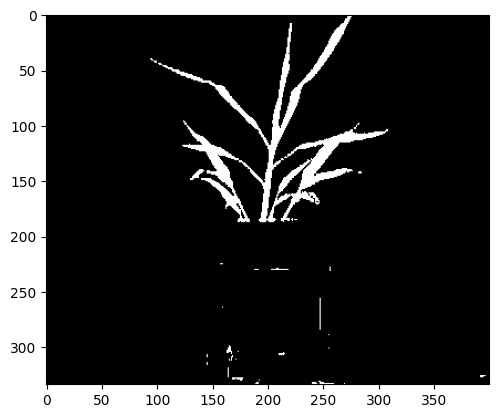

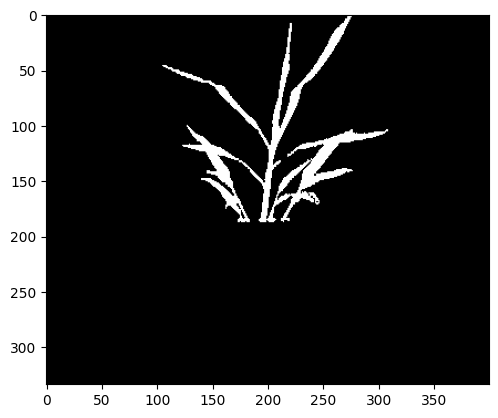

In [44]:
pcv.plot_image(ab)
# 개체를 식별하고 지저이된 크기보다 작은 객체를 제거
ab_fill = pcv.fill(bin_img=ab, size=200)

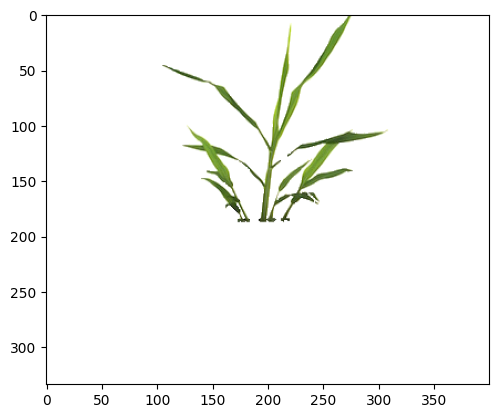

In [45]:
# Apply mask (for VIS images, mask_color=white)
masked2 = pcv.apply_mask(img=masked, mask=ab_fill, mask_color='white')

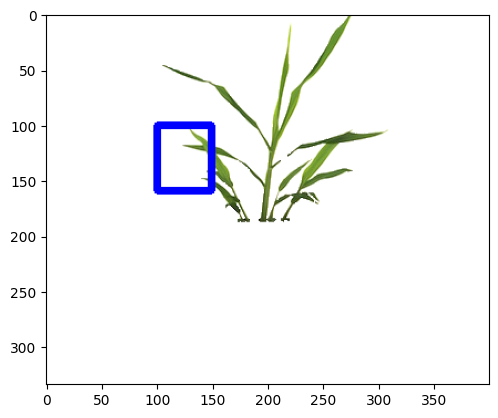

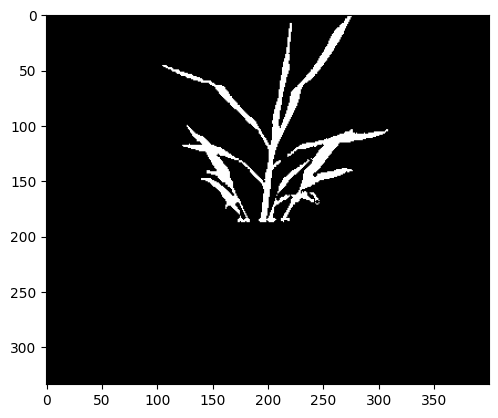

In [63]:
# Identify objects

# Inputs: 
#   img - RGB or grayscale image data for plotting 
#   mask - Binary mask used for detecting contours 
# id_objects, obj_hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)
# roi_objects = pcv.roi.rectangle(img=masked2, x=100, y=0, h=200, w=200)
roi_objects = pcv.roi.rectangle(img=masked2, x=100, y=100, h=60, w=50)
filtered = pcv.roi.filter(mask=ab_fill, roi=roi_objects)

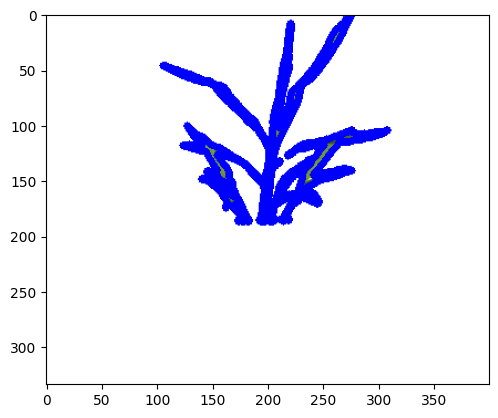

In [57]:
roi_objects = pcv.roi.from_binary_image(img=masked2, bin_img=ab_fill)

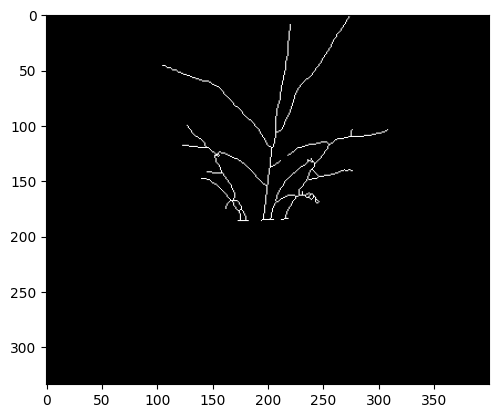

In [67]:
skeletonized = pcv.morphology.skeletonize(mask=ab_fill)

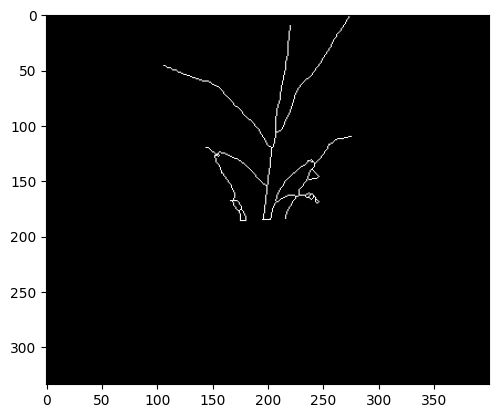

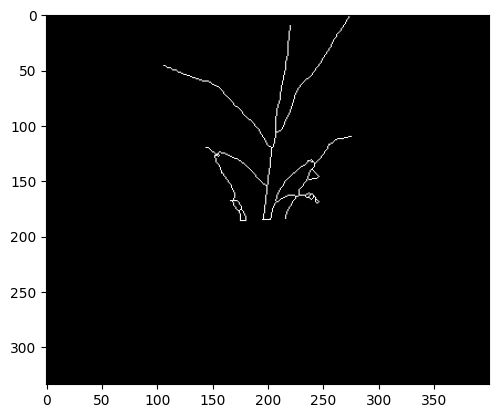

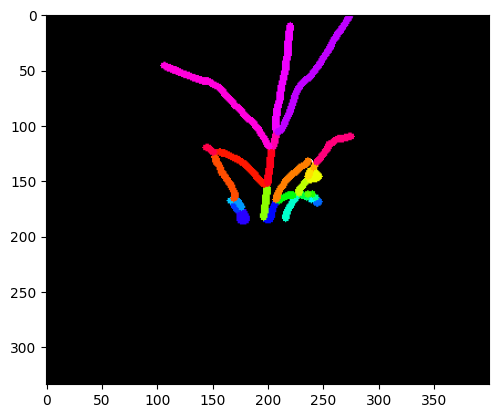

In [69]:
pruned = pcv.morphology.prune(skel_img=skeletonized, size=100)

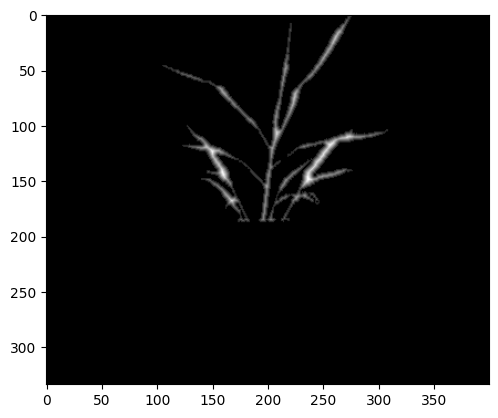

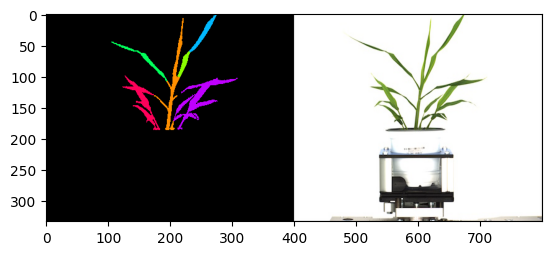

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [230, 230, 230],
        [233, 233, 233],
        [211, 211, 211]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [234, 234, 234]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [252, 252, 252],
        [254, 254, 254],
        [232, 232, 232]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [172, 175, 180],
        [177, 175, 181],
        [158, 154, 160]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [180, 189, 193],
        [183, 192, 196],
        [165, 171, 176]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [151, 163, 167],
        [156, 168, 172],
        [139, 150, 154]]

In [72]:
pcv.watershed_segmentation(rgb_img=img, mask=ab_fill, distance=30)